# Deep Neural Network for Image Classification


## 1 - Packages

 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.

- np.random.seed(1) is used to keep all the random function calls consistent. It will help us grade your work.

In [1]:
import time
import numpy as np
import keras
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from helper_functions import *

%matplotlib inline

np.random.seed(1)

Using TensorFlow backend.


## 2 - Dataset

You will use the same "Cat vs non-Cat" dataset as in "Logistic Regression as a Neural Network" (Assignment 2). The model you had built had 70% test accuracy on classifying cats vs non-cats images. Hopefully, your new model will perform a better!

**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of m_train images labelled as cat (1) or non-cat (0)
    - a test set of m_test images labelled as cat and non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB).

Let's get more familiar with the dataset. Load the data by running the cell below.

In [55]:
# Loading the data (cat/non-cat)
train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
train_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
test_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(['non-cat', 'cat']) # the list of classes
    
train_y = train_y_orig.reshape((1, train_y_orig.shape[0]))
test_y = test_y_orig.reshape((1, test_y_orig.shape[0]))

The following code will show you an image in the dataset. Feel free to change the index and re-run the cell multiple times to see other images. 

y = 0. It's a non-cat picture.


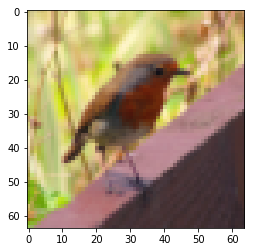

In [56]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]] +  " picture.")

In [58]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


As usual, you reshape and standardize the images before feeding them to the network. The code is given in the cell below.

<img src="images/imvectorkiank.png" style="width:450px;height:300px;">

<caption><center> <u>Figure 1</u>: Image to vector conversion. <br> </center></caption>

In [61]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))
print ("test_y's shape: " + str(test_y.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)
test_y's shape: (1, 50)


$12,288$ equals $64 \times 64 \times 3$ which is the size of one reshaped image vector.

In [62]:
train_x=train_x.T
test_x=test_x.T
train_y=train_y.T
test_y=test_y.T

In [63]:
print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))
print ("train_y's shape: " + str(train_y.shape))
print ("test_y's shape: " + str(test_y.shape))

train_x's shape: (209, 12288)
test_x's shape: (50, 12288)
train_y's shape: (209, 1)
test_y's shape: (50, 1)


## Define Model by keras

In [48]:
from keras.models import Sequential
from keras.layers import Dense ,Dropout
from keras.optimizers import SGD , RMSprop,Adam

In [49]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(12288,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               1572992   
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 65        
Total params: 1,597,825
Trainable params: 1,597,825
Non-trainable params: 0
_________________________________________________________________


In [64]:
sgd = SGD(lr=0.002, decay=1e-6, momentum=0.9)
rmsprop = RMSprop(lr=0.001 ,decay=1e-4)
adam= Adam(lr=0.003 ,decay=1e-4)

model.compile(optimizer=rmsprop,
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [67]:
H1= model.fit(train_x, train_y, batch_size = 32, epochs = 100, 
              validation_data = (test_x, test_y), verbose = 1)

Train on 209 samples, validate on 50 samples
Epoch 1/100
209/209 [==============================] - 3s 16ms/step - loss: 3.7359 - acc: 0.5933 - val_loss: 5.4813 - val_acc: 0.3400
Epoch 2/100
209/209 [==============================] - 0s 2ms/step - loss: 2.1877 - acc: 0.4593 - val_loss: 0.5908 - val_acc: 0.6600
Epoch 3/100
209/209 [==============================] - 0s 2ms/step - loss: 1.4008 - acc: 0.4928 - val_loss: 0.7304 - val_acc: 0.6600
Epoch 4/100
209/209 [==============================] - 0s 2ms/step - loss: 1.1587 - acc: 0.4785 - val_loss: 1.6431 - val_acc: 0.3400
Epoch 5/100
209/209 [==============================] - 0s 2ms/step - loss: 0.8731 - acc: 0.6124 - val_loss: 0.5995 - val_acc: 0.7200
Epoch 6/100
209/209 [==============================] - 0s 2ms/step - loss: 0.6822 - acc: 0.6268 - val_loss: 0.5704 - val_acc: 0.7400
Epoch 7/100
209/209 [==============================] - 0s 2ms/step - loss: 1.0890 - acc: 0.6029 - val_loss: 1.6210 - val_acc: 0.3400
Epoch 8/100
209/209 [==

Epoch 62/100
209/209 [==============================] - 0s 2ms/step - loss: 0.5510 - acc: 0.8278 - val_loss: 0.6417 - val_acc: 0.8000
Epoch 63/100
209/209 [==============================] - 0s 2ms/step - loss: 0.5687 - acc: 0.7416 - val_loss: 0.6861 - val_acc: 0.7400
Epoch 64/100
209/209 [==============================] - 0s 2ms/step - loss: 0.2095 - acc: 0.9091 - val_loss: 0.9627 - val_acc: 0.6800
Epoch 65/100
209/209 [==============================] - 0s 2ms/step - loss: 0.1632 - acc: 0.9330 - val_loss: 1.5424 - val_acc: 0.6200
Epoch 66/100
209/209 [==============================] - 0s 2ms/step - loss: 0.2972 - acc: 0.8804 - val_loss: 0.9801 - val_acc: 0.6400
Epoch 67/100
209/209 [==============================] - 0s 2ms/step - loss: 0.2468 - acc: 0.8708 - val_loss: 0.9726 - val_acc: 0.7200
Epoch 68/100
209/209 [==============================] - 0s 2ms/step - loss: 0.3351 - acc: 0.8756 - val_loss: 3.1465 - val_acc: 0.4200
Epoch 69/100
209/209 [==============================] - 1s 3ms

In [69]:
score = model.evaluate(test_x, test_y)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

50/50 [==============================] - 0s 620us/step
Test loss: 1.06041141987
Test accuracy: 0.699999997616


In [71]:
from sklearn.metrics import classification_report

preds = model.predict_classes(test_x)
print(classification_report(test_y,preds))
preds1 = model.predict_classes(train_x)
print(classification_report(train_y,preds1))

             precision    recall  f1-score   support

          0       0.54      0.76      0.63        17
          1       0.85      0.67      0.75        33

avg / total       0.74      0.70      0.71        50

             precision    recall  f1-score   support

          0       1.00      0.98      0.99       137
          1       0.96      1.00      0.98        72

avg / total       0.99      0.99      0.99       209



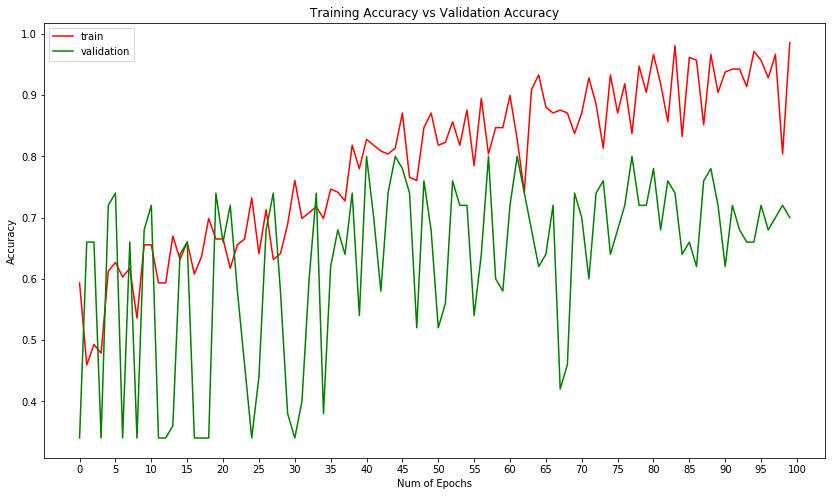

In [73]:
plt.figure(0)
plt.plot(H1.history['acc'],'r')
plt.plot(H1.history['val_acc'],'g')
plt.xticks(np.arange(0, 101, 5.0))
plt.rcParams['figure.figsize'] = (14, 8)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

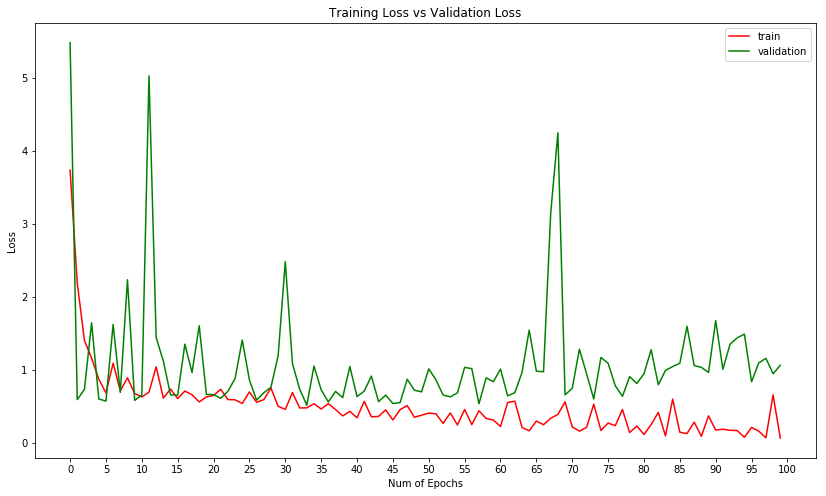

In [74]:
plt.figure(1)
plt.plot(H1.history['loss'],'r')
plt.plot(H1.history['val_loss'],'g')
plt.xticks(np.arange(0, 101, 5.0))
plt.rcParams['figure.figsize'] = (14, 8)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

In [75]:
keras.backend.clear_session() ## clear the previous model. 

In [86]:
model2 = Sequential()
model2.add(Dense(256, activation='relu', input_shape=(12288,)))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(1, activation='sigmoid'))

In [87]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 256)               3145984   
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total para

In [88]:
rmsprop = RMSprop(lr=0.001 ,decay=1e-4)
model2.compile(optimizer=Adam(),
                loss='binary_crossentropy',
                metrics=['accuracy'])


In [89]:
H2= model2.fit(train_x, train_y, batch_size = 32, epochs = 100, 
              validation_data = (test_x, test_y), verbose = 2)

Train on 209 samples, validate on 50 samples
Epoch 1/100
 - 3s - loss: 2.0278 - acc: 0.5167 - val_loss: 0.9909 - val_acc: 0.6600
Epoch 2/100
 - 1s - loss: 2.5013 - acc: 0.5646 - val_loss: 2.2170 - val_acc: 0.3400
Epoch 3/100
 - 1s - loss: 1.5586 - acc: 0.5311 - val_loss: 0.9703 - val_acc: 0.3400
Epoch 4/100
 - 1s - loss: 1.3139 - acc: 0.5837 - val_loss: 0.7629 - val_acc: 0.3600
Epoch 5/100
 - 1s - loss: 1.0351 - acc: 0.5550 - val_loss: 1.0346 - val_acc: 0.3400
Epoch 6/100
 - 1s - loss: 0.8943 - acc: 0.5837 - val_loss: 1.0853 - val_acc: 0.3400
Epoch 7/100
 - 1s - loss: 0.8234 - acc: 0.5598 - val_loss: 0.6739 - val_acc: 0.6200
Epoch 8/100
 - 1s - loss: 0.6988 - acc: 0.6220 - val_loss: 0.6859 - val_acc: 0.6400
Epoch 9/100
 - 1s - loss: 0.7504 - acc: 0.6220 - val_loss: 0.7628 - val_acc: 0.3400
Epoch 10/100
 - 1s - loss: 0.6704 - acc: 0.6220 - val_loss: 0.6714 - val_acc: 0.5800
Epoch 11/100
 - 1s - loss: 0.6503 - acc: 0.6411 - val_loss: 0.7263 - val_acc: 0.3400
Epoch 12/100
 - 1s - loss: 0.

Epoch 97/100
 - 1s - loss: 0.4564 - acc: 0.7703 - val_loss: 1.7251 - val_acc: 0.5000
Epoch 98/100
 - 1s - loss: 0.4845 - acc: 0.7177 - val_loss: 0.7293 - val_acc: 0.4000
Epoch 99/100
 - 1s - loss: 0.5151 - acc: 0.7081 - val_loss: 0.7427 - val_acc: 0.4000
Epoch 100/100
 - 1s - loss: 0.4265 - acc: 0.7225 - val_loss: 1.4902 - val_acc: 0.4600


In [91]:
score = model2.evaluate(test_x, test_y)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

50/50 [==============================] - 0s 640us/step
Test loss: 1.490180583
Test accuracy: 0.46
